In [1]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
import seaborn as sns

Pandas - библиотека для хранения/ обработки/ генерации данных. По сути своей предоставляет вам удобный формат обработки табличный данных. Основная цель библиотеки - ускорить и облегчить работу с данными.

### Типы данных

2 основных типа структур данных в Pandas:

1) pandas.series - одномерный список, колонки в таблице хранятся именно в этом типе

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

2) pandas.table - двумерная таблица

https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

### Создание серий и таблиц 

Данные в *pandas* хранятся в специальном типе *pandas.Series*, таблицы (*pandas.DataFrame*) состоят из *series*. 

In [2]:
test_list = [100,200,300]
pd.Series(data=test_list)

0    100
1    200
2    300
dtype: int64

Создадим кастомные индексы, индекс нужен для однозначного определения "строки" в таблице, он является своего рода уникальным ключем для данных в таблице, но, в отличие от некоторых БД, его уникальность не гарантирована.

In [4]:
dictionary = {'a':100,'b':200,'c':300}
pd.Series(data=dictionary)

a    100
b    200
c    300
dtype: int64

Передадим список списков, где на нижнем уровне лежат объекты таблицы. В результате этой операции мы создадим таблицу, где кол-во столбцов = максимальной длине среди верхнеуровневых элементов.

In [8]:
data = [['thomas', 15, 150], ['nicholas', 25, 180], ['danson', 35, 175]] 
df = pd.DataFrame(data)
df

,0,1,2
0,thomas,15,150
1,nicholas,25,180
2,danson,35,175


Назовем столбы в соответствии с их смыслом

In [10]:
data = [['thomas', 15, 150], ['nicholas', 25, 180], ['danson', 35, 175]] 
df = pd.DataFrame(data, columns = ['Name', 'Age', 'Height'])
df

,Name,Age,Height
0,thomas,15,150
1,nicholas,25,180
2,danson,35,175


Таблицу можно создать из словаря, ключи станут названиями столбцов

In [2]:
data = {'Name':['thomas', 'nicholas', 'danson'], 'Age':[1,3,5]} 
df = pd.DataFrame(data)
df

,Name,Age
0,thomas,1
1,nicholas,3
2,danson,5


### Добавление и  изменение столбцов 

Добавим новый столбец к нашим данным. Это происходит так же, как и в питоновском словаре.

In [3]:
df['New col'] = np.linspace(0,10,df.shape[0])
df

,Name,Age,New col
0,thomas,1,0.0
1,nicholas,3,5.0
2,danson,5,10.0


Можем указать константу, тогда она будет проставлена для каждой записи в таблице

In [4]:
df['New constant columns'] = 1
df

,Name,Age,New col,New constant columns
0,thomas,1,0.0,1
1,nicholas,3,5.0,1
2,danson,5,10.0,1


К столбцам, как и ко всей таблице, можно применять различные операции. Операция будет применена поэлементно к каждому значению в *series*

In [5]:
df['New col power 2'] = df['New col'] ** 2
df

,Name,Age,New col,New constant columns,New col power 2
0,thomas,1,0.0,1,0.0
1,nicholas,3,5.0,1,25.0
2,danson,5,10.0,1,100.0


In [7]:
data = [[15, 150], [25, 180], [35, 175]] 
df = pd.DataFrame(data, columns = ['Age', 'Height'])
df

,Age,Height
0,15,150
1,25,180
2,35,175


Также операцию можно применить ко всей таблице, она тажке примениться к каждому элементу

In [8]:
np.sqrt(df)

,Age,Height
0,3.872983,12.247449
1,5.000000,13.416408
2,5.916080,13.228757


#### Функция apply 

По своей сути *apply* применяет переданную ей функцию к каждому элементу в итерируемом объекте, если рассматривать *pandas*, то это обычно *series* или *table*. 

*Apply* представляет собой аналог *map* из питона. Рассмотрим пример на питоне:

In [2]:
arr = np.array(np.linspace(1,20,10, dtype=np.int8)) # создадим список из элементов
print('Исходный список:',arr)

arr_sqrt = list(map(np.sqrt, arr)) # в Python3 map возвращает генератор, поэтому нужно конвертировать в список
print('Список корней:', arr_sqrt)

print('==========================')
print('Выведем в удобном формате:')
list(zip(arr, arr_sqrt))

Исходный список: [ 1  3  5  7  9 11 13 15 17 20]
Список корней: [1.0, 1.732, 2.236, 2.646, 3.0, 3.316, 3.605, 3.873, 4.125, 4.473]
Выведем в удобном формате:


[(1, 1.0),
 (3, 1.732),
 (5, 2.236),
 (7, 2.646),
 (9, 3.0),
 (11, 3.316),
 (13, 3.605),
 (15, 3.873),
 (17, 4.125),
 (20, 4.473)]

Как вы могли заметить выше, в map нужно передавать именно *имя функции* (np.sqrt, а не np.sqrt()), также объект для итерации должен быть *(барабанная дробь)* итерируемым

In [3]:
arr = 1
list(map(np.sqrt, arr))

TypeError: 'int' object is not iterable

Вот тут можно почитать подробнее и с примерами:

https://www.learnpython.org/en/Map,_Filter,_Reduce

Рассмотрим теперь примеры с *apply*:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html

In [4]:
ser = pd.Series(np.array([1,2,3,4]), index=['a','b','c','d'])
print('Исходный список:')
print(ser)

print('Список логарифмов:')
print(ser.apply(np.log2))

Исходный список:
a    1
b    2
c    3
d    4
dtype: int32
Список логарифмов:
a    0.000000
b    1.000000
c    1.584963
d    2.000000
dtype: float64


*apply* может принимать кастомные функции

In [27]:
def my_func(x, n=2, k=1):
    return x**n - k*3 + 4

ser = pd.Series(np.array([1,2,3,4]), index=['a','b','c','d'])
print('Исходный список:')
print(ser)

print('Новый список:')
print(ser.apply(my_func, args=(3,5)))

Исходный список:
a    1
b    2
c    3
d    4
dtype: int32
Новый список:
a   -10
b    -3
c    16
d    53
dtype: int64


Также удобным может быть передача *lambda* функции

In [26]:
ser = pd.Series(['a','b','c','d'], index=['a','b','c','d'])
print('Исходный список:')
print(ser)

print('Список степеней:')
print(ser.apply(lambda x: str.upper(x)))

Исходный список:
a    a
b    b
c    c
d    d
dtype: object
Список степеней:
a    A
b    B
c    C
d    D
dtype: object


Рассмотрим применение *apply* к таблице

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

In [35]:
data = [[15, 150], [25, 180], [35, 175]] 
df = pd.DataFrame(data, columns = ['Age', 'Height'])
df

,Age,Height
0,15,150
1,25,180
2,35,175


In [36]:
df.apply(lambda x: x-10)

,Age,Height
0,5,140
1,15,170
2,25,165


Если хотите применить *apply* к конкретному столбцу, то значения следует обновить в таблице, иначе они не сохранятся

In [39]:
df['Age'] = df['Age'].apply(lambda x: x+50)
df

,Age,Height
0,65,150
1,75,180
2,85,175


Можно передать в качестве элементов списки, поведение будет зависеть от *result_type*, подробнее можно прочитать в документации

In [45]:
df.apply(lambda x: [5, 25], axis=1, result_type='broadcast') # значения распределятся в соответствии с исходным размером

,Age,Height
0,5,25
1,5,25
2,5,25


In [46]:
df.apply(lambda x: [5, 25, 55], axis=1, result_type='reduce') # значения будут в виде pandas.series

0    [5, 25, 55]
1    [5, 25, 55]
2    [5, 25, 55]
dtype: object

In [47]:
df.apply(lambda x: [5, 25, 55], axis=1, result_type='expand') # значения будут развернуты в то кол-во столбцов, сколько значений

,0,1,2
0,5,25,55
1,5,25,55
2,5,25,55


### Загрузка данных 

Но данные обычно загружаются из сторонних источников, а не создаются вручную, поэтому в Pandas реализованы различные способы загрузки

https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

![title](Pandas_1.png)

In [51]:
df = pd.read_csv('Pokemon.csv')

### Предварительный анализ 

*df.head(n)* вернет вам *n* первых индексов(строк) в таблице

In [5]:
df.head(3) # df.tail(3) - 3 последние записи

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False


*df.info()* покажет основную информацию о таблице

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 13 columns):
#            151 non-null int64
Name         151 non-null object
Type 1       151 non-null object
Type 2       67 non-null object
Total        151 non-null int64
HP           151 non-null int64
Attack       151 non-null int64
Defense      151 non-null int64
Sp. Atk      151 non-null int64
Sp. Def      151 non-null int64
Speed        151 non-null int64
Stage        151 non-null int64
Legendary    151 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 14.4+ KB


*df.shape* вернет размерность таблицы в формате (строк, столбцов)

In [10]:
df.shape

(151, 13)

*df.describe()* покажет основную информацию о распределении значений в столбцах

In [7]:
df.describe() # 25/50/75 - значения соответствующих квантилей

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
count,151.000000,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,76.000000,407.07947,64.211921,72.549669,68.225166,67.139073,66.019868,68.933775,1.582781
std,43.734045,99.74384,28.590117,26.596162,26.916704,28.534199,24.197926,26.746880,0.676832
min,1.000000,195.00000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.000000
25%,38.500000,320.00000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,1.000000
50%,76.000000,405.00000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,1.000000
75%,113.500000,490.00000,80.000000,90.000000,84.000000,87.500000,80.000000,90.000000,2.000000
max,151.000000,680.00000,250.000000,134.000000,180.000000,154.000000,125.000000,140.000000,3.000000


In [11]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Stage', 'Legendary'],
      dtype='object')

Можно переименовать столбцы, передав в *columns* словать, где ключ - столбец, который переименовываем, а значение - новое название

In [52]:
df.rename(columns={'#':'Id'}, inplace=True)

In [4]:
df.head(1)

,Id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


Можно посмотреть на сортированные данные, сортировка происходит в порядке передачи столбцов в параметре by

In [3]:
df.sort_values(by=['HP', 'Attack']).head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
49,50,Diglett,Ground,NaN,265,10,55,25,35,45,95,1,False
128,129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False
62,63,Abra,Psychic,NaN,310,25,20,15,105,55,90,1,False
80,81,Magnemite,Electric,Steel,325,25,35,70,95,55,45,1,False
91,92,Gastly,Ghost,Poison,310,30,35,30,100,35,80,1,False


### Выборки из таблицы 

https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

Pandas поддерживает привычные методы выборки значений, но разработчики советуют использовать специальные методы .at, .iat, .loc и.iloc для ускорения работы.

In [15]:
df[:3]

,Id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False


In [14]:
df['Name'][:3]

0    Bulbasaur
1      Ivysaur
2     Venusaur
Name: Name, dtype: object

In [16]:
df[['Name','Stage']][:3]

,Name,Stage
0,Bulbasaur,1
1,Ivysaur,2
2,Venusaur,3


.loc - выборка по названию с включением границ

.loc в качестве первого элемента принимает индекс таблицы

In [32]:
df.loc[1:3, ['Name','Stage']]

,Name,Stage
1,Ivysaur,2
2,Venusaur,3
3,Charmander,1


Для выбора отдного значения разработчики рекомендуют использовать метод .at, потому что он работает быстрее

In [34]:
df.loc[1, 'Name']

'Ivysaur'

In [35]:
df.at[1, 'Name']

'Ivysaur'

Выбор по позиции (не включает правую границу)

Обратите внимание на выбор индекса - если бы индексы у нас были не числовые (1,2,3), а, например (a,b,c), то в *.iloc* нужно передавать именно порядковый номер индекса, а не значение, как в *.loc*

In [37]:
df.iloc[1:3, 1:3]

,Name,Type 1
1,Ivysaur,Grass
2,Venusaur,Grass


In [38]:
df.iloc[[1,3], [2,3,4]]

,Type 1,Type 2,Total
1,Grass,Poison,405
3,Fire,NaN,309


Для выбора скалярного значения по позиции рекомендуется использовать .iat

In [39]:
df.iat[1, 1]

'Ivysaur'

##### Булева индексация 

Выборка из основной таблицы так же вернет вам *pandas.DataFrame*, его можно сохранить, а можно просто посмотреть

In [41]:
df[df['Speed']>100].head(3)

,Id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
17,18,Pidgeot,Normal,Flying,479,83,80,75,70,70,101,3,False
25,26,Raichu,Electric,NaN,485,60,90,55,90,80,110,2,False
50,51,Dugtrio,Ground,NaN,405,35,80,50,50,70,120,2,False


Можно задать несколько условий, каждое условие должно быть выделено в ()

In [42]:
df[(df['Speed']>100) & (df['Attack']>100)].head(3)

,Id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
122,123,Scyther,Bug,Flying,500,70,110,80,55,80,105,1,False
141,142,Aerodactyl,Rock,Flying,515,80,105,65,60,75,130,1,False
149,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True


In [53]:
df[(df['Speed']>10) & (df['Attack']>100)].iloc[1:4, 1:5]

,Name,Type 1,Type 2,Total
56,Primeape,Fighting,NaN,455
58,Arcanine,Fire,NaN,555
67,Machamp,Fighting,NaN,505


Можно сделать выборку по конкретным значениям для категориальных фичей

In [44]:
df[df['Name'].isin(['Scyther', 'Mewtwo'])]

,Id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
122,123,Scyther,Bug,Flying,500,70,110,80,55,80,105,1,False
149,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True


### Обработка пропусков 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

Посмотрим на кол-во пропусков по столбцам, это можно было понять и из info(), но все же

In [53]:
pd.isna(df).sum() # мы можем применить sum(), потому что нам возвращается маска из True/False, а True == 1

Id            0
Name          0
Type 1        0
Type 2       84
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Stage         0
Legendary     0
dtype: int64

Можно выкинуть эти записи из таблицы, но тогда мы потеряем больше половины информации, можно выкинуть столбец, но это тоже потеря информации

In [9]:
print('Начальная форма:', df.shape)
print('Выкинем столбец:', df.dropna(axis=1).shape)
print('Выкинем строки:',  df.dropna(axis=0).shape)

Начальная форма: (151, 13)
Выкинем столбец: (151, 12)
Выкинем строки: (67, 13)


Поэтому мы заполним пропуски в таблице, есть разные методики заполнения, в нашем случае переменная показывают тип покемона, поэтому заполним пропуски на "без типа"

In [5]:
df = df.fillna(value='No type')
df.head(5)

,Id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,No type,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,No type,405,58,64,58,80,65,80,2,False


In [6]:
pd.isna(df).sum()

Id           0
Name         0
Type 1       0
Type 2       0
Total        0
HP           0
Attack       0
Defense      0
Sp. Atk      0
Sp. Def      0
Speed        0
Stage        0
Legendary    0
dtype: int64

Для непрерывных величин существуют разные методики заполнения пропусков, стандартные - заполнения 0, средним, медианой, модой. Существуют и более сложные способы, например, заполение предполагающее какое-либо распределение данных.

Подробнее: https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

### Кодирование категориальных признаков 

Изображения взяты из https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02

В большинстве случаев модели нужно передать признаки представленные числами, поэтому нужно преобразовать наши признами Type 1, Type 2, Legendary

In [4]:
print('Уникальных значений в Type 1:',    len(df.loc[:,'Type 1'].unique()))
print('Уникальных значений в Type 2:',    len(df.loc[:,'Type 2'].unique()))
print('Уникальных значений в Legendary:', len(df.loc[:,'Legendary'].unique()))

Уникальных значений в Type 1: 15
Уникальных значений в Type 2: 12
Уникальных значений в Legendary: 2


Категориальные признаки можно разделить на:

*номинальные* - характеристика, которую нельзя сравнить с другими градациями,

*порядковые* - те, которые сравнить можно.

![title](Pandas_2.png)

*номинальные* - обычно кодируются методом one-hot-encoding, где кажная градация берется в виде отдельного бинарного признака

![title](Pandas_3.png)

*порядковые* - можно кодировать в соответствии с градацией признака, а можно переводить в аналог one-hot-encoding:

![title](Pandas_6.png)

![title](Pandas_5.png)

#### Номинальные 

In [5]:
df = pd.get_dummies(df ,columns=['Type 1', 'Type 2'])
print('Новый формат:', df.shape)
df.iloc[:,20:].head(5)

Новый формат: (151, 38)


,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Water,Type 2_Fairy,Type 2_Fighting,Type 2_Flying,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_No type,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


При большом кол-ве градаций one-hot-encoding может создать "слишком большое" кол-во признаков, что, в свою очередь, может привести к "проклятию размерности" 

#### Бинарный 

Закодируем бинарный признак 'Legendary' при помощи простого словаря

In [6]:
df.replace({True:1, False:0}, inplace=True)

In [24]:
df.at[0, 'Legendary']

0

#### Перевод непрерывных признаков в категориальные 

![title](Pandas_7.png)

### Шкалирование непрерывных признаков 

Т.к. у нас нет целевого признака попробуем сгруппировать покемонов

https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 38 columns):
Id                 151 non-null int64
Name               151 non-null object
Total              151 non-null int64
HP                 151 non-null int64
Attack             151 non-null int64
Defense            151 non-null int64
Sp. Atk            151 non-null int64
Sp. Def            151 non-null int64
Speed              151 non-null int64
Stage              151 non-null int64
Legendary          151 non-null int64
Type 1_Bug         151 non-null int64
Type 1_Dragon      151 non-null int64
Type 1_Electric    151 non-null int64
Type 1_Fairy       151 non-null int64
Type 1_Fighting    151 non-null int64
Type 1_Fire        151 non-null int64
Type 1_Ghost       151 non-null int64
Type 1_Grass       151 non-null int64
Type 1_Ground      151 non-null int64
Type 1_Ice         151 non-null int64
Type 1_Normal      151 non-null int64
Type 1_Poison      151 non-null int64
Type 1_Psychic     1

Выкинем столбец *"Name"*, потому что его нельзя оценить как-то

In [7]:
df = df.drop('Name', axis=1)

In [8]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(X = df.loc[:, 'Total':'Speed'])

In [9]:
df.loc[:, 'Total':'Speed'] = x_scaled

In [10]:
df.head(5)

,Id,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary,...,Type 2_Flying,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_No type,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,1,-0.896054,-0.674214,-0.888400,-0.716624,-0.075215,-0.042287,-0.897803,1,0,...,0,0,0,0,0,1,0,0,0,0
1,2,-0.020917,-0.147811,-0.397981,-0.194770,0.452220,0.579664,-0.335123,2,0,...,0,0,0,0,0,1,0,0,0,0
2,3,1.186168,0.554059,0.356509,0.550736,1.155465,1.408931,0.415116,3,0,...,0,0,0,0,0,1,0,0,0,0
3,4,-0.986586,-0.884775,-0.775227,-0.940275,-0.251026,-0.664238,-0.147564,1,0,...,0,0,0,0,1,0,0,0,0,0
4,5,-0.020917,-0.217998,-0.322532,-0.381146,0.452220,-0.042287,0.415116,2,0,...,0,0,0,0,1,0,0,0,0,0


Убедимся, что новые данные действительно стандартизированы (среднее = 0, стандартное отклонение = 1)

In [49]:
df.describe()

,Id,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary,...,Type 2_Flying,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_No type,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
count,151.000000,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,151.000000,151.000000,...,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,76.000000,1.191100e-16,1.852823e-16,5.440828e-17,1.573429e-16,2.117511e-16,3.235087e-17,-6.764273e-17,1.582781,0.026490,...,0.125828,0.013245,0.039735,0.019868,0.556291,0.125828,0.039735,0.013245,0.013245,0.026490
std,43.734045,1.003328e+00,1.003328e+00,1.003328e+00,1.003328e+00,1.003328e+00,1.003328e+00,1.003328e+00,0.676832,0.161122,...,0.332759,0.114703,0.195986,0.140009,0.498474,0.332759,0.195986,0.114703,0.114703,0.161122
min,1.000000,-2.133317e+00,-1.902487e+00,-2.548280e+00,-2.356736e+00,-1.833329e+00,-1.908139e+00,-2.023161e+00,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.500000,-8.759363e-01,-6.742139e-01,-8.129512e-01,-6.793482e-01,-7.784605e-01,-7.057012e-01,-8.415348e-01,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,76.000000,-2.091748e-02,-1.478111e-01,-9.618507e-02,-1.202190e-01,-7.521470e-02,-4.228716e-02,3.999619e-02,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,113.500000,8.341014e-01,5.540593e-01,6.583056e-01,5.880114e-01,7.159368e-01,5.796636e-01,7.902353e-01,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,151.000000,2.745320e+00,6.519957e+00,2.318185e+00,4.166439e+00,3.054229e+00,2.445516e+00,2.665833e+00,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Теперь наши данные можно передать в какой-нибудь PCA и визуализировать их (о PCA вам расскажут чуть позже)

In [19]:
df_1 = df.copy()

In [20]:
from sklearn.decomposition import PCA

df_1 = PCA(n_components=2).fit_transform(df_1)

In [42]:
df_1 = pd.DataFrame(df_1, columns=['0', '1'])

In [43]:
df_1['Stage'] = df['Stage']
df_1.head()

,0,1,Stage
0,-75.014170,0.481179,1
1,-73.993039,-1.282378,2
2,-72.962068,-3.614590,3
3,-72.017054,0.798680,1
4,-70.993376,-1.113929,2


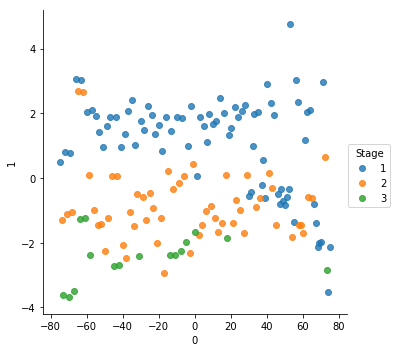

In [48]:
sns.lmplot(x='0', y='1', data=df_1, fit_reg=False, hue='Stage')

Как можно видеть на графике бОльшую часть вариативности вносит признак *'1'*

### Агрегационные функции и группировка

https://pandas.pydata.org/pandas-docs/version/0.22/api.html#groupby

In [51]:
df = pd.read_csv('Pokemon.csv')
df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


Возьмем среднее по столбцам сгруппировав данные по параметру 'Stage'

In [54]:
df.groupby('Stage', as_index=False).agg('mean') # as_index=False нужен, чтобы 1-ый столбец результата не стал в итоге индексом

,Stage,Id,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,85.632911,360.734177,57.708861,63.696203,60.797468,57.202532,58.594937,62.734177,0.050633
1,2,70.589286,446.660714,69.642857,80.107143,75.964286,74.910714,71.250000,74.785714,0.000000
2,3,47.375000,497.375000,77.312500,89.812500,77.812500,89.000000,84.375000,79.062500,0.000000


Для стандартных функций агрегации есть готовые методы min(), max(), mean() и тд

In [56]:
df.groupby('Stage', as_index=False).max()

,Stage,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,151,Zubat,Water,680,250,125,160,154,125,130,True
1,2,148,Wigglytuff,Water,555,140,130,180,125,120,140,False
2,3,149,Vileplume,Water,600,91,134,130,135,105,120,False


Можно сгруппировать данные по нескольким столбцам и тогда данные будут сгруппированы для каждого варианта 1-го агрумента по 2-му аргументу и тд.

In [64]:
df.groupby(['Stage', 'Type 1'], as_index=False).agg('mean').iloc[[0,5,10,15,20,25,30], :] # возьмем часть данных

,Stage,Type 1,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bug,61.166667,330.000000,52.500000,70.833333,58.333333,39.166667,50.000000,59.166667,0.000000
5,1,Fire,74.666667,407.166667,56.166667,73.833333,55.000000,78.333333,66.666667,77.166667,0.166667
10,1,Normal,88.200000,356.733333,80.000000,61.933333,49.866667,45.800000,59.400000,59.733333,0.000000
15,2,Bug,30.250000,316.250000,56.250000,51.250000,61.250000,50.000000,51.250000,46.250000,0.000000
20,2,Fire,63.200000,498.000000,70.200000,96.000000,68.600000,87.200000,87.000000,89.000000,0.000000
25,2,Poison,54.666667,435.500000,72.666667,82.333333,76.333333,65.000000,72.333333,66.833333,0.000000
30,3,Dragon,149.000000,600.000000,91.000000,134.000000,95.000000,100.000000,100.000000,80.000000,0.000000


В качестве агрегационных функций можно передать несколько функций и тогда для каждого столбца будет несколько агрегированых столбцов

In [65]:
df.groupby('Stage', as_index=False).agg(['min', 'max'])

#           Name             Type 1        Total       HP       ...  \
      min  max       min         max    min    max   min  max min  max  ...   
Stage                                                                   ...   
1       1  151      Abra       Zubat    Bug  Water   195  680  10  250  ...   
2       2  148     Arbok  Wigglytuff    Bug  Water   205  555  35  140  ...   
3       3  149  Alakazam   Vileplume    Bug  Water   395  600  55   91  ...   

      Defense      Sp. Atk      Sp. Def      Speed      Legendary         
          min  max     min  max     min  max   min  max       min    max  
Stage                                                                     
1           5  160      15  154      20  125    15  130     False   True  
2          30  180      25  125      25  120    30  140     False  False  
3          40  130      45  135      65  105    45  120     False  False  

[3 rows x 22 columns]

Можно разным столбцам передать разные агрегационные функции, тогда в результате будут только переданные в словарь столбцы

In [66]:
df.groupby('Stage', as_index=False).agg({'Total':['min', 'max'], 'Speed':['mean']})

Stage Total           Speed
          min  max       mean
0     1   195  680  62.734177
1     2   205  555  74.785714
2     3   395  600  79.062500

Еще groupby имеет возможность построить корреляции признаков, разделив данные по какому-либо из них

In [57]:
df.groupby('Stage', as_index=False).corr()

#     Total        HP    Attack   Defense   Sp. Atk  \
0 #          1.000000  0.691729  0.352336  0.406773  0.505292  0.464634   
  Total      0.691729  1.000000  0.568409  0.649840  0.476148  0.658946   
  HP         0.352336  0.568409  1.000000  0.212533  0.032393  0.190458   
  Attack     0.406773  0.649840  0.212533  1.000000  0.440088  0.158619   
  Defense    0.505292  0.476148  0.032393  0.440088  1.000000  0.197216   
  Sp. Atk    0.464634  0.658946  0.190458  0.158619  0.197216  1.000000   
  Sp. Def    0.491359  0.783949  0.500866  0.355564  0.133279  0.493384   
  Speed      0.329771  0.538142 -0.030307  0.299369  0.018783  0.388840   
  Stage           NaN       NaN       NaN       NaN       NaN       NaN   
  Legendary  0.322381  0.557207  0.247250  0.295453  0.265776  0.556069   
1 #          1.000000  0.564084  0.194869  0.365484  0.365559  0.364701   
  Total      0.564084  1.000000  0.436031  0.574326  0.374505  0.567404   
  HP         0.194869  0.436031  1.000000  0.252396  0.022739  0.173591   
  Attack     0.365484  0.574326  0.252396  1.000000  0.391130 -0.125795   
  Defense    0.365559  0.374505  0.022739  0.391130  1.000000  0.004422   
  Sp. Atk    0.364701  0.567404  0.173591 -0.125795  0.004422  1.000000   
  Sp. Def    0.284664  0.658003  0.317981  0.194615 -0.111407  0.384075   
  Speed      0.082726  0.363814 -0.274952 -0.018723 -0.288509  0.250584   
  Stage           NaN       NaN       NaN       NaN       NaN       NaN   
  Legendary       NaN       NaN       NaN       NaN       NaN       NaN   
2 #          1.000000  0.482952  0.168772  0.489309  0.212310  0.223802   
  Total      0.482952  1.000000  0.565398  0.482972  0.572660  0.341039   
  HP         0.168772  0.565398  1.000000  0.782991  0.688596 -0.452145   
  Attack     0.489309  0.482972  0.782991  1.000000  0.594304 -0.484161   
  Defense    0.212310  0.572660  0.688596  0.594304  1.000000 -0.307945   
  Sp. Atk    0.223802  0.341039 -0.452145 -0.484161 -0.307945  1.000000   
  Sp. Def   -0.021518  0.465809  0.104268 -0.078055  0.069069  0.304146   
  Speed     -0.046892  0.136878 -0.439209 -0.527925 -0.518091  0.579664   
  Stage           NaN       NaN       NaN       NaN       NaN       NaN   
  Legendary       NaN       NaN       NaN       NaN       NaN       NaN   

              Sp. Def     Speed  Stage  Legendary  
0 #          0.491359  0.329771    NaN   0.322381  
  Total      0.783949  0.538142    NaN   0.557207  
  HP         0.500866 -0.030307    NaN   0.247250  
  Attack     0.355564  0.299369    NaN   0.295453  
  Defense    0.133279  0.018783    NaN   0.265776  
  Sp. Atk    0.493384  0.388840    NaN   0.556069  
  Sp. Def    1.000000  0.390204    NaN   0.350420  
  Speed      0.390204  1.000000    NaN   0.335904  
  Stage           NaN       NaN    NaN        NaN  
  Legendary  0.350420  0.335904    NaN   1.000000  
1 #          0.284664  0.082726    NaN        NaN  
  Total      0.658003  0.363814    NaN        NaN  
  HP         0.317981 -0.274952    NaN        NaN  
  Attack     0.194615 -0.018723    NaN        NaN  
  Defense   -0.111407 -0.288509    NaN        NaN  
  Sp. Atk    0.384075  0.250584    NaN        NaN  
  Sp. Def    1.000000  0.285740    NaN        NaN  
  Speed      0.285740  1.000000    NaN        NaN  
  Stage           NaN       NaN    NaN        NaN  
  Legendary       NaN       NaN    NaN        NaN  
2 #         -0.021518 -0.046892    NaN        NaN  
  Total      0.465809  0.136878    NaN        NaN  
  HP         0.104268 -0.439209    NaN        NaN  
  Attack    -0.078055 -0.527925    NaN        NaN  
  Defense    0.069069 -0.518091    NaN        NaN  
  Sp. Atk    0.304146  0.579664    NaN        NaN  
  Sp. Def    1.000000  0.111765    NaN        NaN  
  Speed      0.111765  1.000000    NaN        NaN  
  Stage           NaN       NaN    NaN        NaN  
  Legendary       NaN       NaN    NaN        NaN

Удобнее эти данные посмотреть при помощи seaborn.heatmap

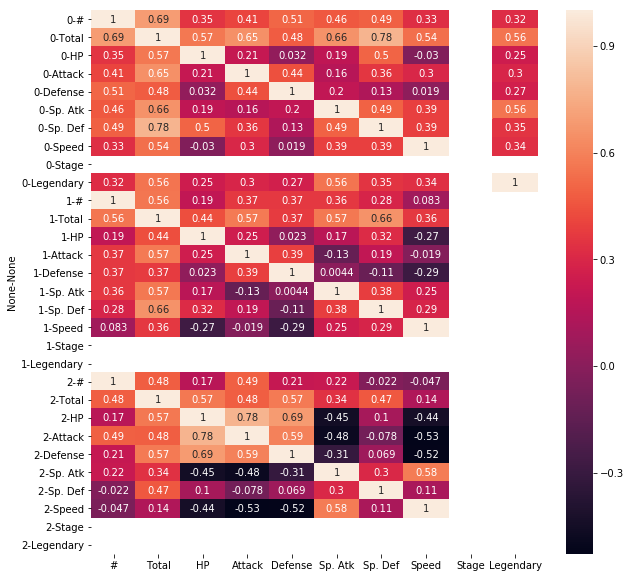

In [60]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.groupby('Stage', as_index=False).corr(), annot=True, ax=ax)

### Слияние таблиц

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging

##### merge 

In [10]:
left = pd.DataFrame({'key': ['K1', 'K0', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K3', 'K2'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

В pandas.merge() реализованы привычные по SQL-стилистике слияния таблиц

In [8]:
result = pd.merge(left, right, how='inner', on='key', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True, copy=True, indicator=True)
result

,key,A,B,C,D,_merge
0,K0,A1,B1,C0,D0,both
1,K1,A0,B0,C1,D1,both
2,K2,A2,B2,C3,D3,both
3,K3,A3,B3,C2,D2,both


![title](Pandas_8.png)

Параметр *how* принимает 'left', 'right', 'outer', 'inner'

![title](Pandas_9.png)

*on* принимает столбец присутствующий в обеих таблицах, можно указать из какой таблицы по какому столбцу объеденять явно указав
столбцы в параметрах *left_on* и *right_on*

*left_on, right_on* - если данные объеденять по индексу

*sort* - сортирует значения по ключу

*indicator* - добавляет столбец, показывающий, есть ли данные с таким значением ключа в обеих таблицах

##### concat 

*concat* нужен, если вы хотите просто соеденить 2 таблицы, по горизонтали или вертикали 

In [11]:
pd.concat([left, right], axis = 1)

,key,A,B,key,C,D
0,K1,A0,B0,K0,C0,D0
1,K0,A1,B1,K1,C1,D1
2,K2,A2,B2,K3,C2,D2
3,K3,A3,B3,K2,C3,D3


ignore_index=True нужен, потому что иначе в итоговой таблице будут дубликаты по индексу

In [18]:
pd.concat([left, right], axis = 0, ignore_index=True, sort=False)

,key,A,B,C,D
0,K1,A0,B0,NaN,NaN
1,K0,A1,B1,NaN,NaN
2,K2,A2,B2,NaN,NaN
3,K3,A3,B3,NaN,NaN
4,K0,NaN,NaN,C0,D0
5,K1,NaN,NaN,C1,D1
6,K3,NaN,NaN,C2,D2
7,K2,NaN,NaN,C3,D3


### Построение графиков 

Можно быстро посторить интересующие вас графики для таблицы

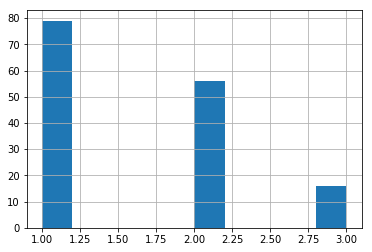

In [4]:
df.loc[:, 'Stage'].hist()

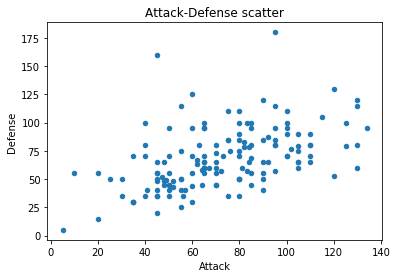

In [12]:
df.plot(kind='scatter', x='Attack', y='Defense', title='Attack-Defense scatter')

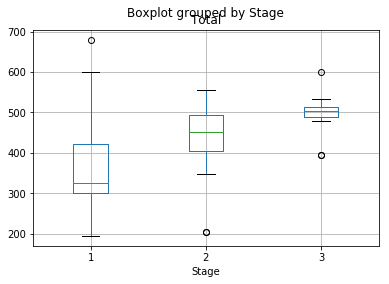

In [8]:
df.boxplot(column='Total', by='Stage')

### Прочие материалы 

Краткое введение в Pandas из документации

https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

Много продвинутых возможностей Pandas продемонстированы в официальном cookbook

https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html

Много гайдов вы можете найти в примерах из книги Hands-on Machine Learning with Scikit-Learn and TensorFlow: 

https://github.com/ageron/handson-ml